# Boosting as Additive Models

- **Boosting** sequentially aggregates high-bias models to create a low-bias ensemble.

- The ensemble $F^{(K)}$ is a weighted sum of $f^{(k)}$, for all $k \in \{1, \ldots, K\}$:

	$$
	F^{(K)}(x) = \sum_{k=1}^K \alpha f^{(k)}(x)
	$$

- We add one model at a time sequentially:

	$$
	F^{(K+1)}(x) = \sum_{k=1}^{K+1} \alpha f^{(k)}(x) = F^{(K)}(x) + \alpha f^{(K+1)}(x)
	$$

- Train the parameters of the next $(K + 1)$-th model by keeping the past models fixed:

	$$
	\theta^{(K+1)} \coloneqq \arg \min_\theta \sum_{n=1}^N \mathcal{L}\left(y_n, F^{(K)}(x_n) + \alpha f(x_n; \theta)\right)
	$$



![image](../../images/ensembles.png)



In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.utils import resample

In [13]:
X, y = make_regression(n_samples=200, n_features=1, n_targets=1, random_state=42, noise=30.0)
X_full = np.linspace(-3.0, 3.0, 1000)

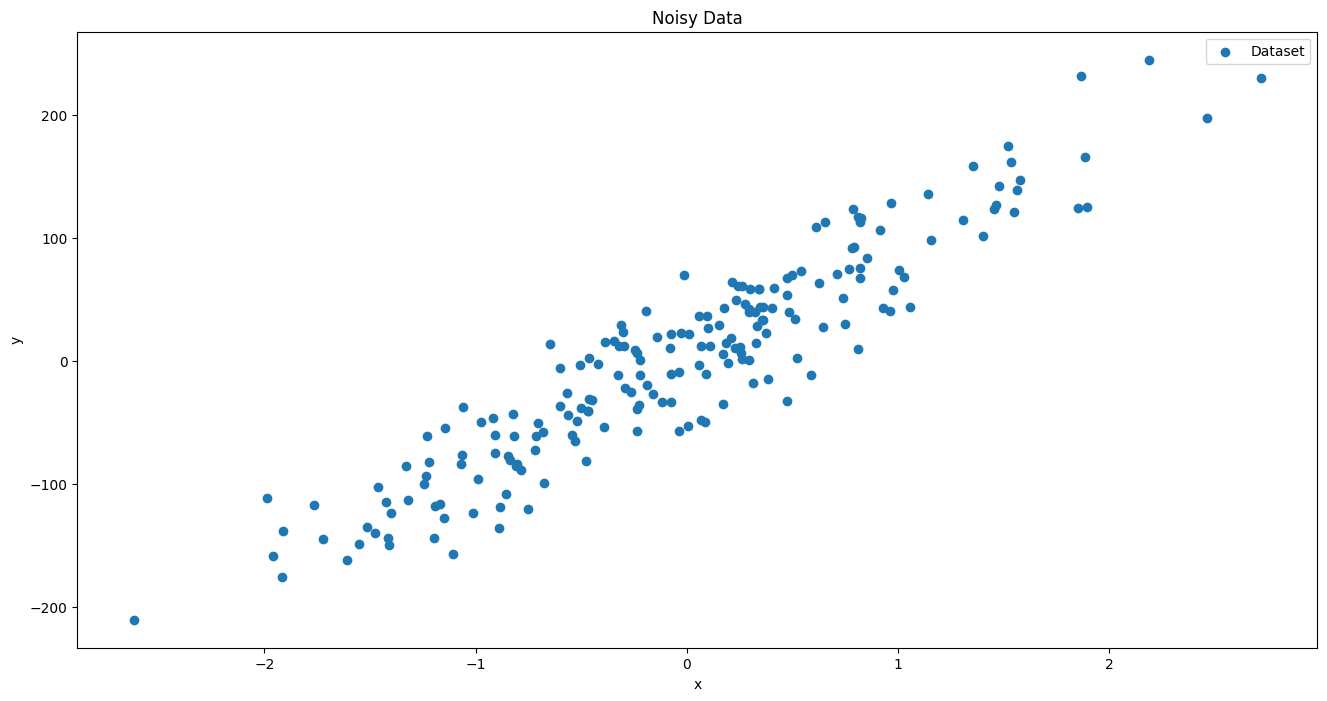

In [14]:
plt.figure(figsize=(16, 8))
plt.title('Noisy Data')
plt.scatter(X, y, label='Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [16]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (160, 1)
y_train shape: (160,)
X_test shape: (40, 1)
y_test shape: (40,)


In [17]:
class GradientBoostingRegressor:
	def __init__(self,
			  n_estimators: int = 1000, 
			  alpha: float=0.1) -> None:
		
		self.n_estimators = n_estimators
		self.models = []
		self.alpha = alpha

	def fit(self,
		X: np.ndarray,
		y: np.ndarray) -> None:

		self.models = []
		F = np.zeros_like(y)
		for _ in range(self.n_estimators):
			# Pseudo rediduals
			z = -(-2 * (y - F)) # Could wrote 2 * (y - F), im not stupid
			
			# Fit a new model to residuals
			model = LinearRegression()
			model.fit(X, z)
			self.models.append(model)
			
			# Update predictions	
			F = F + self.alpha * model.predict(X)

	def predict(self, x: np.ndarray) -> np.ndarray:
		return np.sum(np.array([self.alpha * f.predict(x) for f in self.models]), axis=0)

In [18]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [19]:
r2 = r2_score(y_hat, y_test)
print(f'R2 score: {r2}')

R2 score: 0.8516616769091832


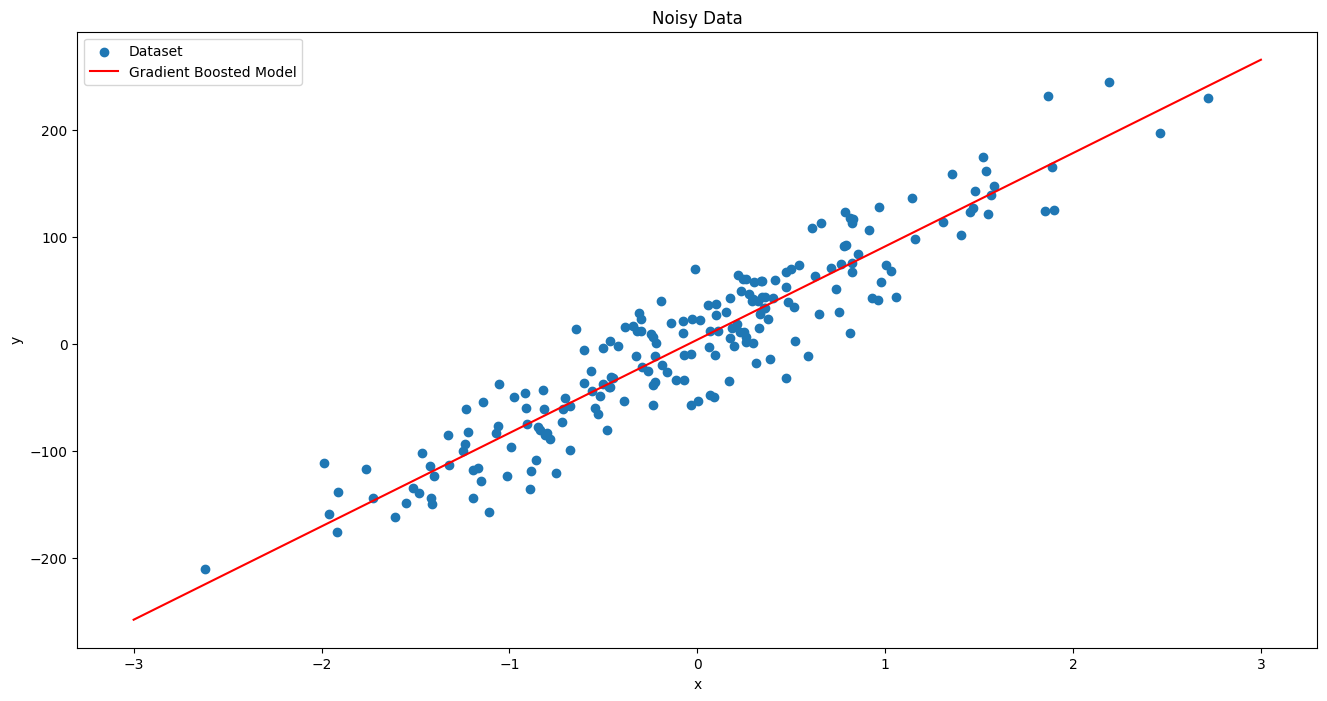

In [20]:
plt.figure(figsize=(16, 8))
plt.title('Noisy Data')
plt.scatter(X, y, label='Dataset')
plt.plot(X_full, model.predict(X_full.reshape(-1, 1)), label='Gradient Boosted Model', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()